In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("E:/Datasets/smartphone_sales.csv")

In [3]:
cols=list(df.columns)
cols


['Quarter', 'Apple', 'Samsung', 'Huawei', 'Xiaomi', 'OPPO']

In [4]:
df.head()

,Quarter,Apple,Samsung,Huawei,Xiaomi,OPPO
0,3Q16,43001,71734,32490,14926,24591
1,4Q16,77039,76783,40804,15751,26705
2,1Q17,51993,78776,34181,12707,30922
3,2Q17,44315,82855,35964,21179,26093
4,3Q17,45442,85605,36502,26853,29449


In [5]:
#X_train,X_test,y_train,y_test #where  X is feature_cols and y is label

df01=df.iloc[:,1:]
cols=df01.columns
cols

Index(['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'OPPO'], dtype='object')

Text(0, 0.5, 'Sale')

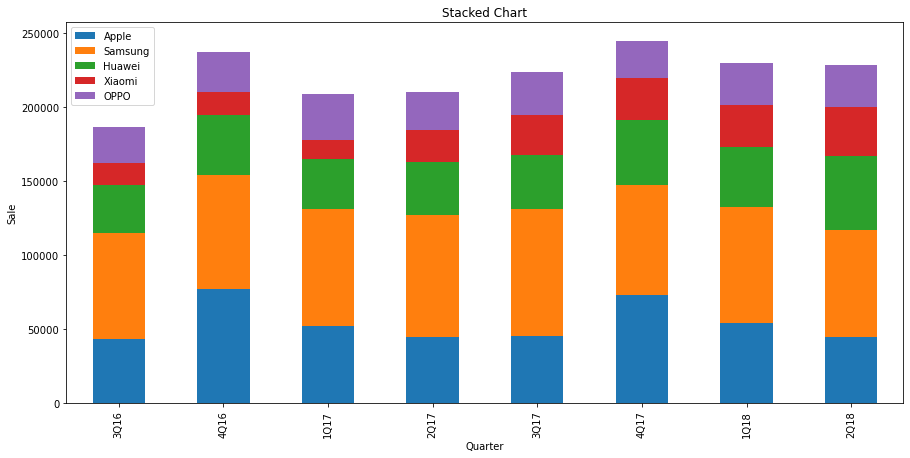

In [9]:
chrt=df01.plot(kind='bar',stacked=True, figsize=(15,7))

plt.xticks(range(len(df.Quarter)),df.Quarter)
plt.title("Stacked Chart")
plt.xlabel("Quarter")
plt.ylabel("Sale")

for p in chrt.patches:
    chrt.annotate(format(p.get_height(),'.0f'),
                 (p.get_x()+p.get_width()/2.p.get_height()),
                 ),
                    

In [13]:
#count=df['label'][df['label']==0].count()
#count#total number of zero's in dataset

In [17]:
X=df[feature_cols] #features
y=label #target variable
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=1)

In [120]:
def applyClsAlgo(algo='GNB',slvr='lbfgs',mx_itr=1000,criteria='entropy',mx_dpt=3,krnl='rbf'):
    if algo=='LogReg':
        from sklearn.linear_model import LogisticRegression
        clfr=LogisticRegression(solver=slvr,max_iter=mx_itr)
    elif algo=='DT':
        from sklearn.tree import DecisionTreeClassifier
        clfr=DecisionTreeClassifier(criterion=criteria,max_depth=mx_dept)
    elif algo=='GNB':
        from sklearn.naive_bayes import GaussianNB
        clfr=GaussianNB()
    elif algo=='SVC':
        from sklearn.svm import SVC
        clfr=SVC(kernel=krnl)
    elif algo=='KNN':
        from sklearn.neighbors import KNeighborsClassifier
        clfr=KNeighborsClassifier(n_neighbors=mx_dpt)
    elif algo=='RFC':
        from sklearn.ensemble import RandomForestClassifier
        clfr=RandomForestClassifier(n_estimators=mx_dpt)
    return clfr
        

In [121]:
clf=applyClsAlgo(algo='RFC')
clf

RandomForestClassifier(n_estimators=3)

In [122]:
clf=clf.fit(X_train,y_train) #train classifier

In [123]:
y_pred=clf.predict(X_test) #predict the response for test dataset 

# Calculate Accuracy

In [124]:
#calculate accuracy
from sklearn import metrics

In [125]:
result=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)


Confusion Matrix
[[152  63]
 [ 83  95]]


In [126]:
def plt1():
    import seaborn as sns; sns.set
    c_mtrx=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
    sns.heatmap(c_mtrx,annot=True)

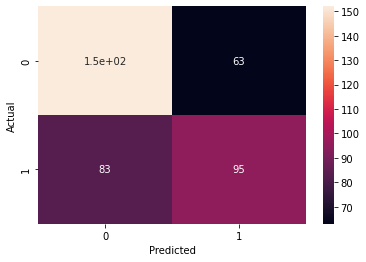

In [127]:
plt1()

In [128]:
#row column
TP=result[1,1]
TN=result[0,0]
FP=result[0,1]
FN=result[1,0]

# Metrics computed from confusion matrix
Classfication Accuracy:Overall, how often is the classifier correct?(TP+TN)/(TP+TN+FP+FN)
Classification Error(Misclassification Rate): Overall, how often is the classifier incorrect? (FP+FN)/(TP+TN+FP+FN)
Classification Error:1-Classification Accuracy
Sensitivity Recall: When the actual value is positive, how oten is the prediction correct? TP/(FN+TP)
Specificity: When the actual value is negative,how often is the prediction correct TN/(TN+FP)
Precision: When a positive vlaue is predicted, how often is the prediction correct?TP/(TP+FP)
Classification Error(Misclassification Rate): Overall, how often is the classifier incorrect? 
False Positive Rate: When the actual value is negative, how often is the prediciton incorrect? FP/(TN+FP)



In [129]:
def EvClsMdl(res):
    print("metrics computed from a confusion matrix")
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    

In [130]:
EvClsMdl(result)

metrics computed from a confusion matrix
Accuracy:	 0.628498727735369
Sensitivity:	 0.5337078651685393
Specificity:	 0.7069767441860465
Precision:	 0.6012658227848101
Classification Eerror: 0.37150127226463103
False_Positive_Rate: 0.2930232558139535


In [131]:
y=pd.DataFrame({'Original':y_test,'Predicted':y_pred})
y.head()

,Original,Predicted
201,0,0
115,0,0
255,1,0
1103,0,0
195,1,1


In [132]:
y.sample(10)

,Original,Predicted
1085,0,1
821,1,0
767,0,1
1271,0,1
891,1,0
1263,0,0
663,0,0
286,1,1
34,0,0
409,0,0
